# Upper Confidence Bound (UCB)

## Importing the libraries

In [233]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

## Importing the dataset

In [234]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [235]:
N = len(dataset) #Number of users
d = len(dataset.iloc[0]) # number of ads
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0

for n in range(N):
    ad = 0
    max_upper_bound = 0
    for i in range(d):
        if numbers_of_selections[i] > 0:
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt( 3/2 * (math.log(n + 1) / numbers_of_selections[i]) )
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400

        if upper_bound > max_upper_bound:
                max_upper_bound = upper_bound
                ad = i

    numbers_of_selections[ad] += 1
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] += reward
    total_reward += reward

print(sums_of_rewards)
print(ads_selected)

[120, 47, 7, 38, 1675, 1, 27, 236, 20, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 0, 8, 1, 2, 3, 4, 5, 6, 6, 7, 7, 7, 9, 7, 0, 6, 8, 1, 2, 3, 4, 4, 4, 4, 4, 5, 9, 7, 0, 0, 6, 8, 4, 0, 7, 1, 1, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 7, 7, 7, 7, 7, 4, 2, 3, 5, 9, 1, 6, 8, 0, 0, 7, 0, 4, 1, 6, 8, 2, 3, 5, 9, 7, 0, 4, 4, 4, 7, 7, 7, 7, 1, 6, 8, 2, 3, 5, 9, 0, 7, 7, 4, 7, 7, 7, 1, 6, 8, 0, 4, 4, 2, 3, 5, 9, 4, 7, 0, 7, 1, 1, 1, 6, 6, 6, 6, 6, 8, 4, 2, 3, 5, 9, 7, 7, 7, 0, 6, 4, 1, 1, 1, 8, 7, 2, 3, 5, 9, 4, 0, 1, 1, 1, 6, 7, 8, 4, 1, 2, 3, 5, 9, 0, 6, 7, 8, 4, 7, 1, 0, 6, 2, 3, 5, 9, 7, 7, 7, 7, 4, 4, 4, 4, 4, 7, 8, 1, 0, 6, 6, 6, 7, 4, 2, 3, 5, 9, 1, 6, 8, 7, 0, 4, 4, 4, 4, 4, 2, 3, 5, 9, 1, 6, 7, 4, 8, 0, 7, 4, 4, 4, 1, 6, 2, 3, 5, 9, 0, 0, 0, 7, 8, 4, 0, 0, 0, 1, 6, 7, 4, 2, 3, 5, 9, 0, 8, 7, 1, 6, 4, 0, 7, 7, 7, 7, 7, 2, 3, 5, 9, 8, 4, 1, 6, 6, 6, 7, 7, 7, 0, 6, 7, 4, 1, 1, 1, 2, 2, 2, 3, 5, 9, 2, 8, 7, 0, 1, 

## Visualising the results

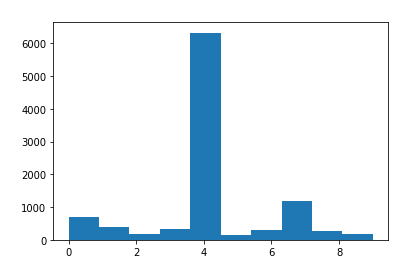

In [236]:
plt.hist(ads_selected)
plt.title('Histogram of Ads Selected', c='white')
plt.xlabel('Ads', c='white')
plt.ylabel('Number of times each ad was selected', c='white')
plt.show()